# importing required libraries.

In [1]:
import pandas as pd
import plotly as py
import numpy as np
import folium
import warnings
from IPython.display import display, HTML
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# formating and returning the date and time as string using strptime() function

In [2]:
def myparser(x):
    return datetime.strptime(x, '%d/%B/%Y %H:%M:%S')   #date parser method

# reading dataset

In [3]:
data_frame = pd.read_csv('police_department_data.csv',parse_dates=True, date_parser=myparser) # ,index_col=['crime_date']

In [4]:
crime_df = data_frame.copy()
crime_df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,25/04/2016 14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410590e+13,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,05/01/2016 23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600140e+13,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,01/01/2016 00:30,MISSION,NONE,16TH ST / MISSION ST,1.600030e+13,"(37.7650501214668, -122.419671780296)"


In [5]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_id          150500 non-null  int64  
 1   category             150500 non-null  object 
 2   crime_description    150500 non-null  object 
 3   crime_date           150500 non-null  object 
 4   department_district  150499 non-null  object 
 5   resolution           150500 non-null  object 
 6   address              150500 non-null  object 
 7   department_id        150500 non-null  float64
 8   location             150500 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.3+ MB


# removing brackets and commas from location

In [6]:
crime_df['location'] = crime_df['location'].str.replace('(', '')
crime_df['location'] = crime_df['location'].str.replace(')', '')
crime_df['location'] = crime_df['location'].str.replace(',', '')
crime_df[['lat','long']] = crime_df.location.str.split(expand=True)
crime_df.head(1)

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,lat,long
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,29/01/2016 11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200580e+13,37.775420706711 -122.403404791479,37.775420706711,-122.403404791479


In [7]:
crime_df= crime_df.drop('location', axis=1) #removing the location colom 

In [8]:
print('columns, rows',crime_df.shape)

columns, rows (150500, 10)


In [9]:
category_df = pd.DataFrame((crime_df.groupby( [ "category"] ).count()).reset_index())
category_df.drop(['crime_description','crime_date','department_district','resolution','address','department_id','lat','long'], axis =1, inplace =True)
category_df = category_df.rename(columns={'incident_id': 'incident_count'})

# insight 1- Bubble Chart (Top category of crime and amount)

In [10]:
category_df_sorted = category_df.sort_values('incident_count',ascending=False)
ipywLayout = widgets.Layout(border='solid 2px green')

def bubble_chart(Scroll):

        figBubble = px.scatter(
                                category_df_sorted.head(Scroll),
                                x = 'category', 
                                y ='incident_count',
                                size= 'incident_count',
                                color = 'category', 
                                hover_name='category' ,
                                size_max=60
                              )
        figBubble.update_layout(

                                title="Top Categories Under Commited Crime",
                                yaxis_title="Count of crime under categories",
                                xaxis_title="Categories",
                                font=dict(family="Trebuchet MS",size=16,color="#778899"),
                                xaxis_showgrid=True,
                                yaxis_showgrid=True,
                                plot_bgcolor='rgba(0,0,0,0)',
                                

                            )

        figBubble.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')
        figBubble.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')

        figBubble.show();

interact(bubble_chart, Scroll=30);

interactive(children=(IntSlider(value=30, description='Scroll', max=90, min=-30), Output()), _dom_classes=('wi…

In [11]:
department_district = pd.DataFrame((crime_df.groupby( ["department_district"] ).count()).reset_index())
department_district.drop(['crime_description','crime_date','category','resolution','address','department_id','lat','long'], axis =1, inplace =True)
department_district = department_district.rename(columns={'incident_id': 'incident_count'})

# insight 2- Top crimes commited district wise

In [12]:
department_district_sorted = department_district.sort_values('incident_count',ascending=False)
ipywLayout = widgets.Layout(border='solid 2px green')

def bubble_chart(Scroll):

        figBubble = px.scatter(
                                department_district_sorted.head(Scroll),
                                x = 'department_district', 
                                y ='incident_count',
                                size= 'incident_count',
                                color = 'department_district', 
                                hover_name='department_district' ,
                                size_max=60
                              )
        figBubble.update_layout(

                                title="Top Crime Commited in District wise Department",
                                yaxis_title="Count of crime committed",
                                xaxis_title="Deparments",
                                font=dict(family="Trebuchet MS",size=16,color="#778899"),
                                xaxis_showgrid=True,
                                yaxis_showgrid=True,
                                plot_bgcolor='rgba(0,0,0,0)',
                                

                            )

        figBubble.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')
        figBubble.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')

        figBubble.show();

interact(bubble_chart, Scroll=10);

interactive(children=(IntSlider(value=10, description='Scroll', max=30, min=-10), Output()), _dom_classes=('wi…

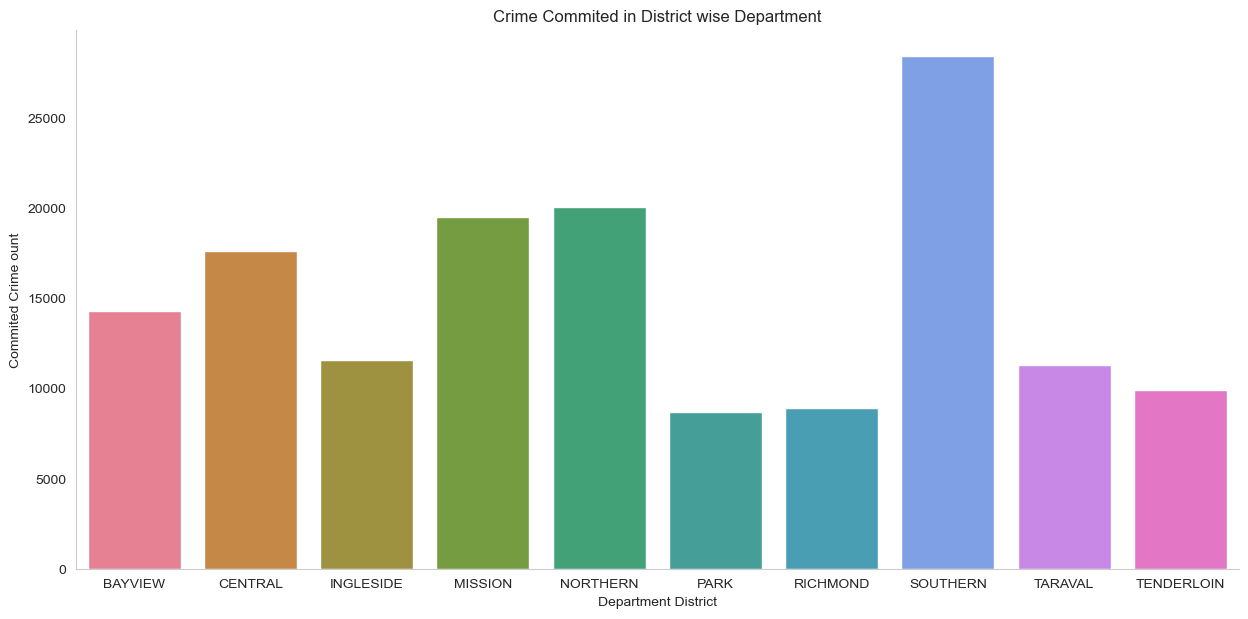

In [13]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(15,7))
figure = sns.barplot(x="department_district", y="incident_count", data=department_district,palette="husl");
sns.despine(bottom = False, left = False)
figure.set(xlabel = "Department District", ylabel = "Commited Crime ount");
figure.set_title('Crime Commited in District wise Department');

# wordcloud plot

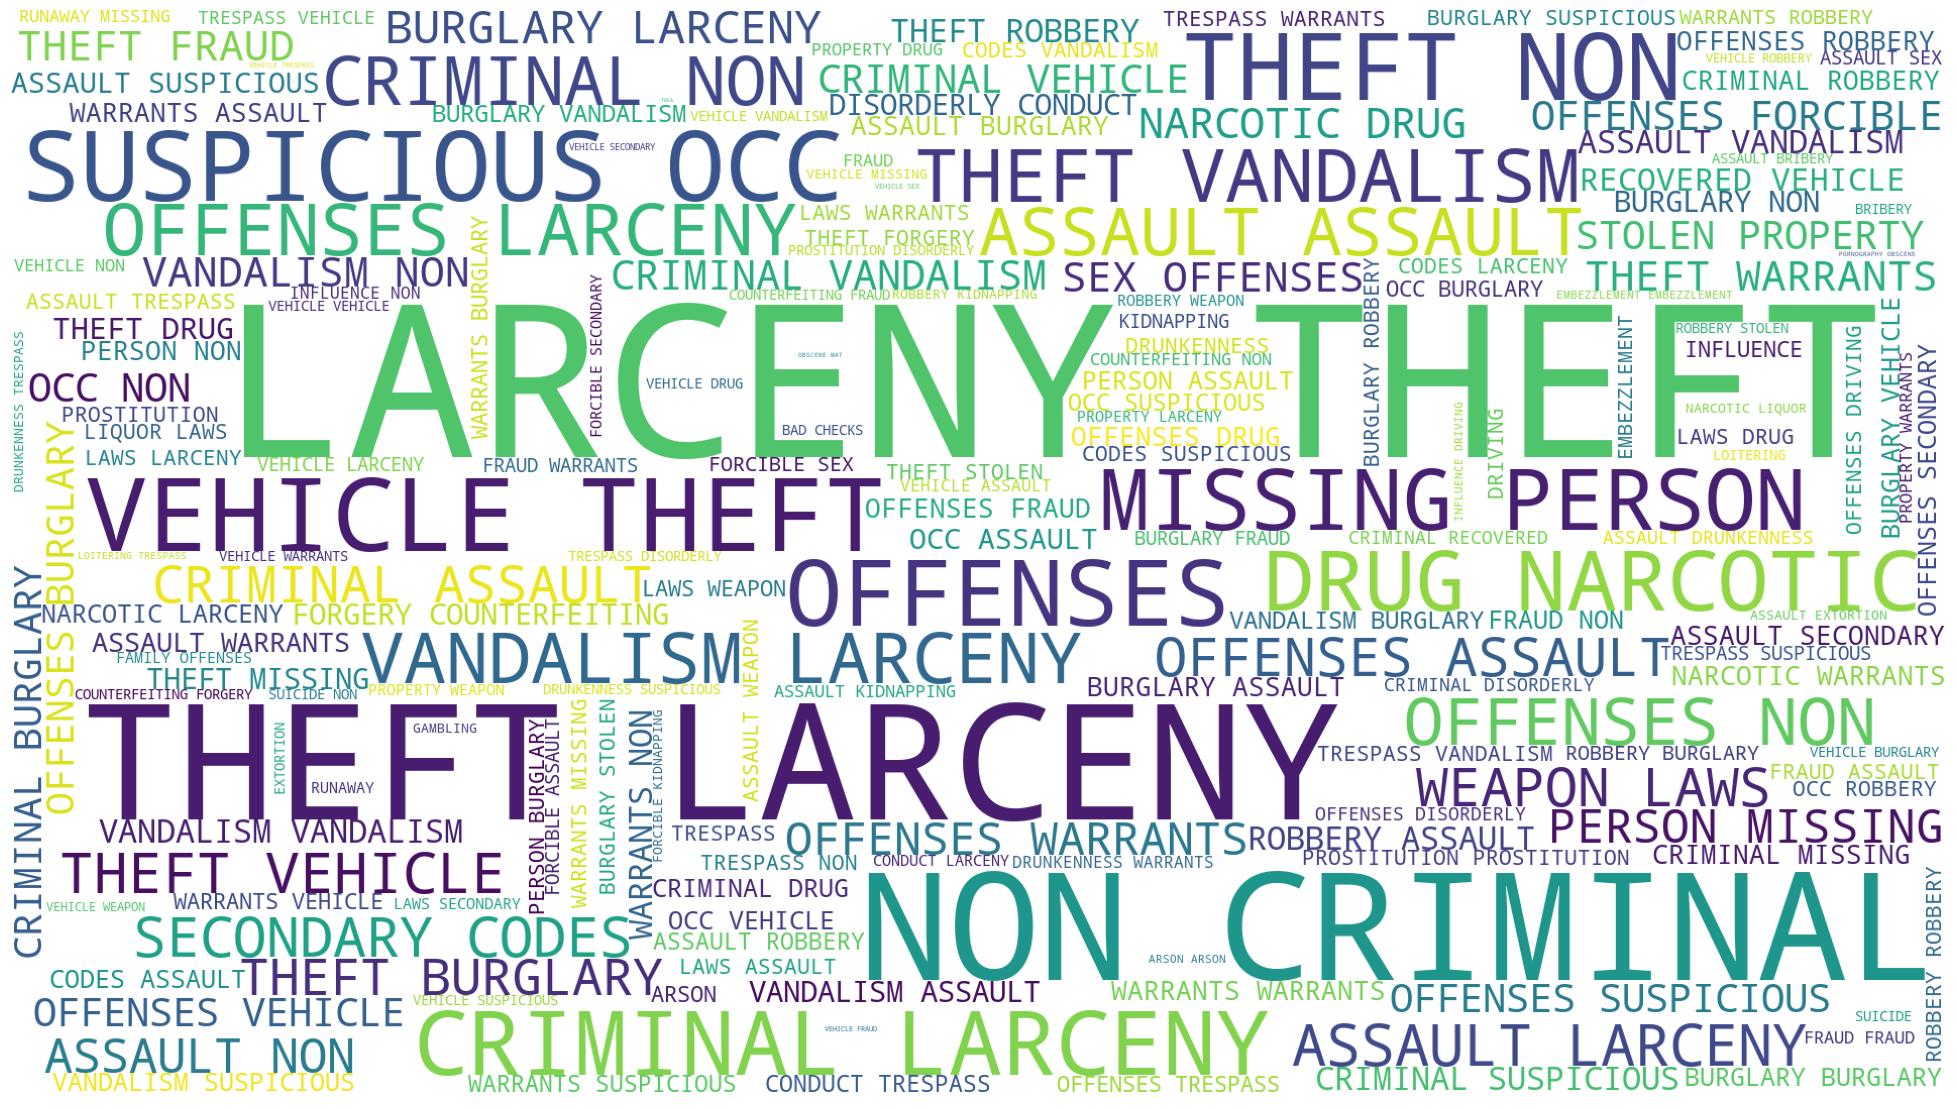

In [14]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(crime_df.category))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# pichart showing percentage of crime in specific regions

In [15]:
labels = crime_df.department_district.unique()
values=[]
for each in labels:
    values.append(len(data_frame[crime_df.department_district==each]))

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [16]:
date_df = pd.DataFrame((crime_df.groupby( [ "crime_date"]).count()).reset_index())
date_df.set_index('crime_date',inplace=True)
date_df.head()

,incident_id,category,crime_description,department_district,resolution,address,department_id,lat,long
crime_date,,,,,,,,,
01/01/2016 00:01,68,68,68,68,68,68,68,68,68
01/01/2016 00:05,3,3,3,3,3,3,3,3,3
01/01/2016 00:07,3,3,3,3,3,3,3,3,3
01/01/2016 00:09,2,2,2,2,2,2,2,2,2
01/01/2016 00:10,4,4,4,4,4,4,4,4,4


In [17]:
date_df.index = pd.to_datetime(date_df.index,unit='ns')
daily_df = date_df.resample('Q').mean()

daily_df.drop(['crime_description','category','resolution','address','department_id','lat','long','department_district'], axis =1, inplace =True)
daily_df = daily_df.rename(columns={'incident_id': 'crime_count'})

daily_df = daily_df.reset_index()
daily_df = pd.DataFrame(daily_df)

daily_df

,crime_date,crime_count
0,2016-03-31,2.283107
1,2016-06-30,2.214434
2,2016-09-30,2.223750
3,2016-12-31,2.245287


In [18]:
daily_df['month'] = pd.DatetimeIndex(daily_df['crime_date']).month


def mapper(month):
    return month.strftime('%d/%b/%Y') 

daily_df['crime_date'] = daily_df['crime_date'].apply(mapper)
daily_df

,crime_date,crime_count,month
0,31/Mar/2016,2.283107,3
1,30/Jun/2016,2.214434,6
2,30/Sep/2016,2.223750,9
3,31/Dec/2016,2.245287,12


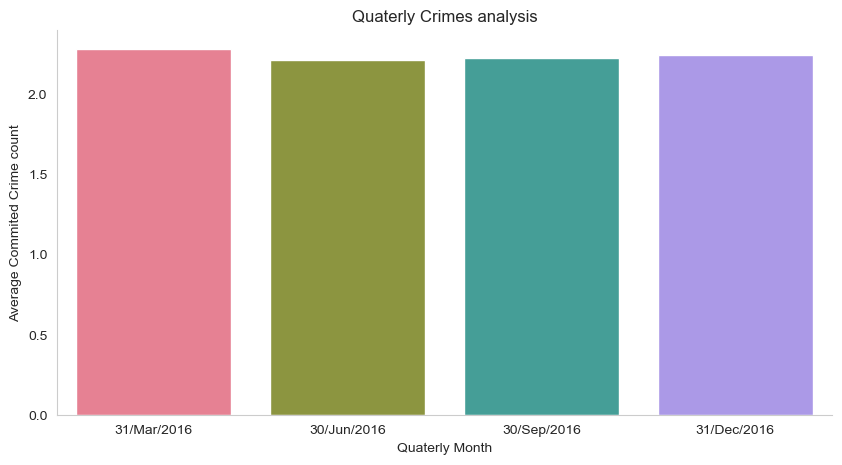

In [19]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,5))
figure = sns.barplot(x="crime_date", y="crime_count", data=daily_df,palette="husl");
figure.set_title('Quaterly Crimes analysis')
sns.despine(bottom = False, left = False)
figure.set(xlabel = "Quaterly Month", ylabel = "Average Commited Crime count");

In [20]:
daily_df['crime_date'] = pd.to_datetime(daily_df['crime_date'], errors='coerce')

In [21]:
week_df = daily_df.groupby(daily_df['crime_date'].dt.day_name()).mean()
week_df

,crime_count,month
crime_date,,
Friday,2.223750,9.0
Saturday,2.245287,12.0
Thursday,2.248771,4.5


In [22]:
week_df = week_df.reset_index()
week_df = week_df.rename(columns={'crime_date': 'Day of Week'})
week_df.drop('month',axis=1,inplace=True)

In [23]:
week_df['crime_count'].values

array([2.22374977, 2.24528746, 2.24877065])

# Crime in week days

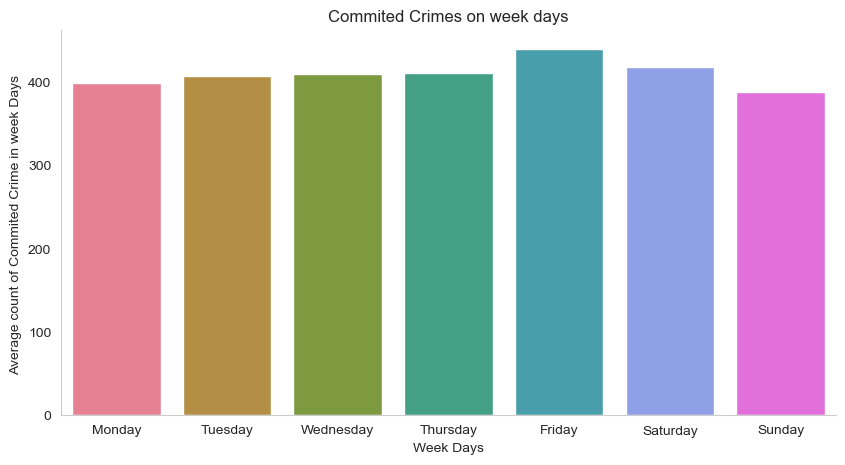

In [24]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,5))
figure = sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'], 
                     y=[399.673077,408.500000,410.230769,411.442308,440.962264,418.339623,388.557692], 
                     data=week_df,
                     palette="husl");
sns.despine(bottom = False, left = False)
figure.set_title('Commited Crimes on week days')
figure.set(xlabel = "Week Days", ylabel = "Average count of Commited Crime in week Days ");

In [25]:
figBar = go.Figure(
    data=[
        go.Bar(
            
            name="Category",
            x= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],
            y= [399.673077,408.500000,410.230769,411.442308,440.962264,418.339623,388.557692],
            #marker=dict(color='#0000FF')
        ),


    ],
    layout=go.Layout(
        title="Commited crimes on week days",
        yaxis_title="Crime count on week days",
        xaxis_title="Week Days",
        font=dict(family="Trebuchet MS",size=16,color="#778899"),
        xaxis_showgrid=True,
        yaxis_showgrid=True,
        width=700,
        height=600,
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
    )

)

figBar.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')
figBar.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC'),
figBar.update_yaxes(automargin=True)

figBar.show();

In [26]:
date_df.index = pd.to_datetime(date_df.index)
Monthly_df = date_df.resample('M').sum()

Monthly_df.drop(['crime_description','category','resolution','address','department_id','lat','long','department_district'], axis =1, inplace =True)
Monthly_df = Monthly_df.rename(columns={'incident_id': 'crime_count'})

Monthly_df = Monthly_df.reset_index()
Monthly_df = pd.DataFrame(Monthly_df)

# crime count in every month

In [27]:
Monthly_df['month'] = pd.DatetimeIndex(Monthly_df['crime_date']).month
Monthly_df['month']

def mapper(month):
    return month.strftime('%b') 
Monthly_df['crime_date'] = Monthly_df['crime_date'].apply(mapper)
Monthly_df

,crime_date,crime_count,month
0,Jan,13876,1
1,Feb,11733,2
2,Mar,12423,3
3,Apr,12237,4
4,May,12816,5
5,Jun,12258,6
6,Jul,12367,7
7,Aug,12340,8
8,Sep,12334,9
9,Oct,12942,10
